# Mathias Dyhr - Computational Social Science Notes

## Week 1(Web Scrabing)

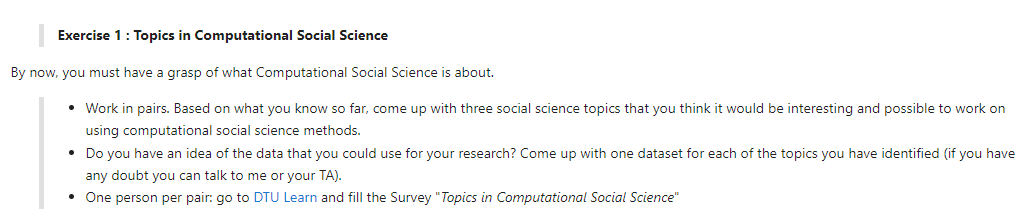

1. 
* Finde ud af hvor mange serial morder der er på twitter?
* Assesing response time of companies?
* What is peoples political views?

2. 
* Twitter, Facebook
* Their emails, Meeting hours and company data
* Twitter, SocMed


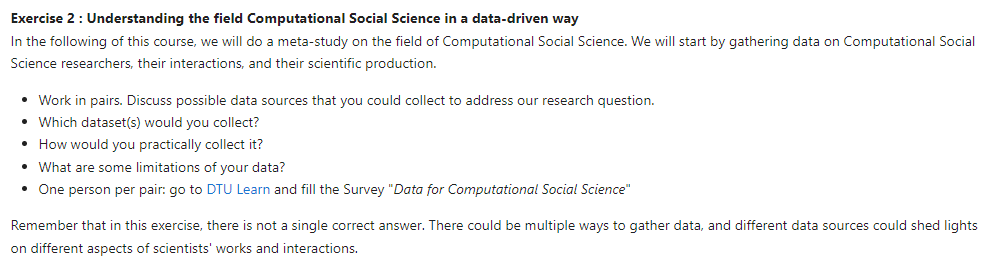

1.
* Wikipedia, LinkedIn,Seshatdatabank
2.
* Social Complexity Dataset, twitter dataset
3.
* Webscraping, and download/request data from websites
4.
* Missing data, and deficiencies in data measurements, public data only 

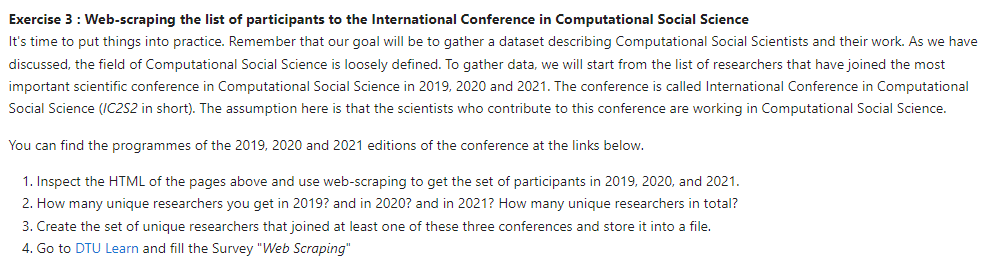

In [6]:
from bs4 import BeautifulSoup ##A package to work with HTML data
import requests #A package to make HTTP requests

In [27]:
# 2019 part 1
LINK = "https://2019.ic2s2.org/oral-presentations/"
r = requests.get(LINK)
soup = BeautifulSoup(r.content)
div = soup.find("div",{"class":"col-md-8 page-content-wrap"})
div_p = div.find_all("p")[3:]
# div_p
for d in div_p:
    d.strong.extract()
data = []
for d in div_p:
    output = d.get_text(strip=True,separator="\n").splitlines()[1:]
    for out in output:
        if out[0].isdigit():
            removed_date = list(filter(None, out.split("–")[2:]))[0]
            removed_topic = removed_date.split(".")[0]
            researchers = removed_topic.split(",")
            for r in researchers:
                data.append(r)
        elif out.split(": ")[0] == "Chair":
            data.append(out.split(": ")[1])

data_unique = list(set(data))
len(data_unique)

549

In [28]:
# 2019 part 2
LINK = "https://2019.ic2s2.org/posters/"
r = requests.get(LINK) 
soup = BeautifulSoup(r.content)
div = soup.find("div",{"class":"col-md-8 page-content-wrap"})
data=[]
for child in div.find("ul").children:
    txt = child.get_text(strip=True,separator="\n").split("<span>")[0].split("\n")[0]
    txt = txt.replace(" and ",", ")
    txt_split = txt.split(", ")
    for t in txt_split:
        data.append(t)
        count += 1    
count

1414

In [15]:
# 2021 
LINK = "https://easychair.org/smart-program/IC2S2-2021/talk_author_index.html"
r = requests.get(LINK) 
soup = BeautifulSoup(r.content)
table = soup.find("table",{"class":"index"})    
 # How many people there is in total
table_rows = table.find_all("tr")
rows = []
count = 0
for tr in table_rows[1:]:
    people = tr.find_all("td","name")
    for person in people:
        count += 1
        print(person.text)
print("Number of people:", count)

Aberer, Karl
Adam, Silke
Adelani, David
Agarwal, Nitin
Aggarwal, Minali
Ahn, Yong-Yeol
Aiello, Luca
Akbaritabar, Aliakbar
Aksoy, Ozan
Alessandretti, Laura
Alexander, Monica
Aliapoulios, Maxwell
Allen, Jennifer
Alorić, Aleksandra
Alvarez-Hamelin, José-Ignacio
Amirkhanian, Yuri A.
An, Jisun
Anderson, Ashton
Aneja, Harshit
Aramaki, Eiji
Archer, Luke
Arechar, Antonio
Aref, Samin
Aridor, Guy
Arielli, Emanuele
Artime, Oriol
Axelrod, David
Azizi Fard, Narges
Bailey, Michael
Bajardi, Paolo
Balietti, Stefano
Balsamo, Duilio
Banisch, Sven
Barahona, Mauricio
Barkoczi, Daniel
Baronchelli, Andrea
Baronchelli, Andrea
Bastani, Hamsa
Bastani, Osbert
Battiston, Alice
Bauer, Leo
Bedathur, Srikanta
Beeferman, Doug
Beersma, Bianca
Beiró, Mariano G.
Belli, Luca
Bernstein, Michael S.
Berry, George
Bhadani, Saumya
Bhattacharya, Indrajit
Bhole, Monica
Bilsen, Daniel
Blackburn, Jeremy
Bohm, Matteo
Boichenko, Anton
Bokanyi, Eszter
Borgmann, Philip
Boros, Krisztián
Bozarth, Lia
Bracci, Alberto
Brambilla, Marco
B

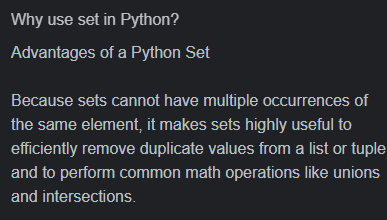

In [10]:
# 2021 
LINK = "https://easychair.org/smart-program/IC2S2-2021/talk_author_index.html"
r = requests.get(LINK) 
soup = BeautifulSoup(r.content)
table = soup.find("table",{"class":"index"})    
 # How many people there is in total
#How many unique people in total
table_rows = table.find_all("tr")
rows = []
people_set = set()
for tr in table_rows[1:]:
    people = tr.find_all("td","name")
    for person in people:
        people_set.add(person.text)
#print("Number of unique people:", len(people_set))
print(people_set)


{'Muntaner, Carles', 'Lasser, Jana', 'Peng, Hao', 'Luo, Lan', 'Parigi, Paolo', 'Katona, Eszter', 'Pappalardo, Luca', 'Hassoun, Amelia', 'Brunet, Marc-Etienne', 'Lackner, Simone', 'Kmetty, Zoltán', 'Janský, Petr', 'Lehmann, Sune', 'Schulze, Heidi', 'Pescetelli, Niccolò', 'Jurgens, David', 'Yu, Renzhe', 'Youn, Hyejin', 'Adelani, David', 'Perello, Nicholas', 'Madani, Navid', 'McGuinness, Harvey', 'Deitrick, James', 'Shirado, Hirokazu', 'Rilke, Rainer', 'Horvitz, Eric', 'Laurer, Moritz', 'Bohm, Matteo', 'Mepham, Kieran', 'Ciampaglia, Giovanni Luca', 'Dokuka, Sofia', 'Pallis, George', 'Rama, Daniele', 'Zhao, Xinyi', 'Zheng, Sylvan', 'Tittel, Katharina', 'Dementeva, Yulia', 'Manovich, Lev', 'Turner, Benjamin', 'Kteily, Nour', 'Liu, David', 'Stefanelli, Alberto', 'Savonnet, Marinette', 'Haberly, Daniel', 'Li, Xiancheng', 'Sert, Egemen', 'Comes, Tina', 'Di Natale, Anna', 'Choudhari, Jayesh', 'Lu, Yingdan', 'Catasta, Michele', 'Wapman, K. Hunter', 'Hui, Pik-Mai', 'Kalimeri, Kyriaki', 'Elmas, Tu

## Week 2(API)

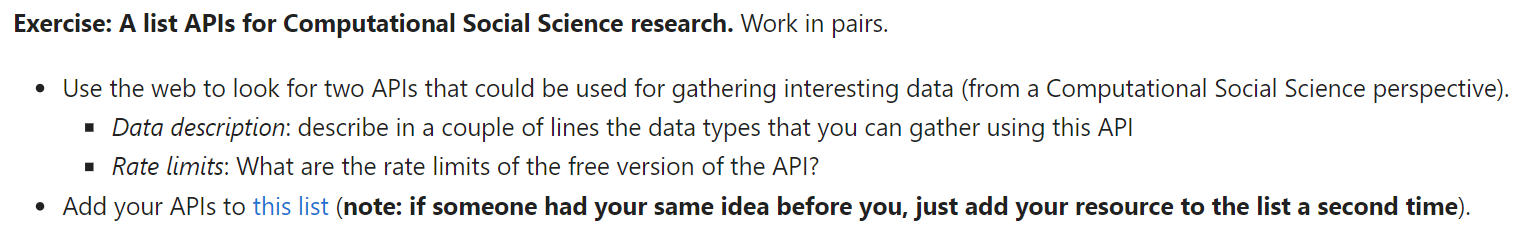

1. Graph API
 - The Graph API is the primary way for apps to read and write to the Facebook social graph. 
 - The rate limits for the Facebook Graph API depend on the type of access token being used and the API version. As of my training data (2021), some of the rate limits for the Graph API are:

 - User access tokens:
  - 60 requests per user per minute, up to a maximum of 200 requests per app per minute.
 - App access tokens:
  - 600 requests per minute for apps, up to a maximum of 200 requests per app per minute.
 - Page access tokens:
  - 200 requests per user per minute, up to a maximum of 200 requests per app per minute.

2. Google Maps API
 - For mapping and location data.
 - While there is no maximum number of requests per day, the following usage limits are in place for the Maps JavaScript  API:
 -  30,000 requests per minute.
 -  300 requests per minute per IP address. In the Google Cloud Console, this quota is referred to as Map loads per minute    per user.


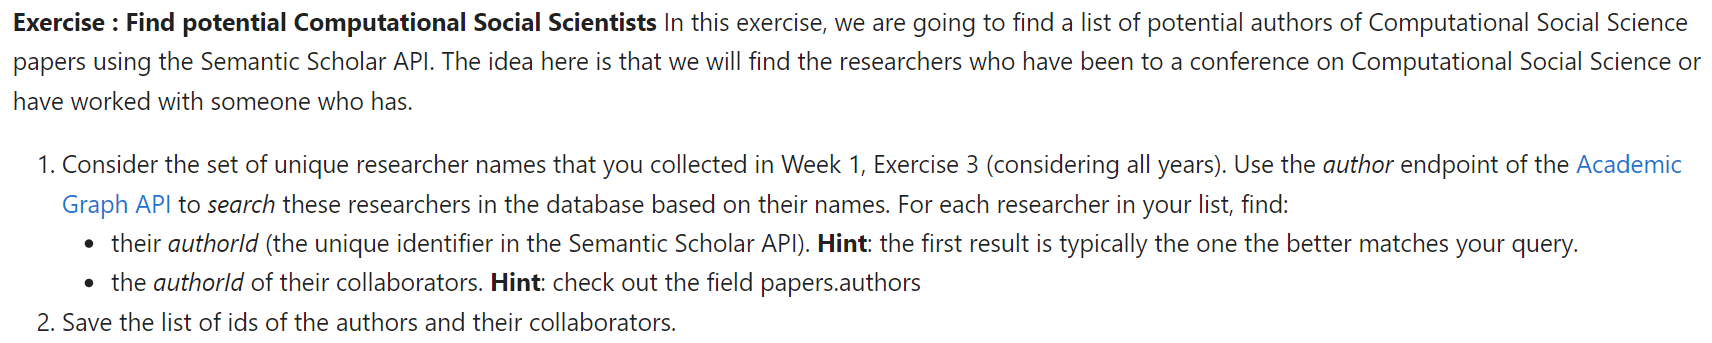

In [2]:
import requests

In [56]:
import numpy as np
names = list(np.load("names.npy"))

In [57]:
BASE_URL = "https://api.semanticscholar.org/graph/"
VERSION = "v1/"
AUTHOR = "author/search"

In [58]:
author_ids = []
for name in names:  
    params = {'query':name,
                "fields":"name,papers.title,papers.authors"}

In [59]:
my_url = BASE_URL + VERSION + AUTHOR

In [61]:
r = requests.get(my_url, params=params)
r_json = r.json()
if r_json["total"] != 0:
    r_data = r_json["data"][0]
    author_ids.append(r_data["authorId"])
    
    for paper in r_data["papers"]:
        for author in paper["authors"]:
            author_ids.append(author["authorId"])
r_json

{'total': 7,
 'offset': 0,
 'data': [{'authorId': '2087659410',
   'name': 'T. Müller',
   'papers': [{'paperId': '85833f2628545d7b08a6db4e9029ad2020c7a1d0',
     'title': 'Cultural Evolution of Precise and Agreed-Upon Semantic Conventions in a Multiplayer Gaming App',
     'authors': [{'authorId': '49065222', 'name': 'O. Morin'},
      {'authorId': '2087659410', 'name': 'T. Müller'},
      {'authorId': '2599077', 'name': 'T. Morisseau'},
      {'authorId': '144929327', 'name': 'James Winters'}]},
    {'paperId': '1b3887eb52795180e3a02c4f6fdfaab2f9bafb4a',
     'title': 'Hybrid social learning in human-algorithm cultural transmission',
     'authors': [{'authorId': '1678486592', 'name': 'L. Brinkmann'},
      {'authorId': '2174486558', 'name': 'D. Gezerli'},
      {'authorId': '118644540', 'name': 'K. V. Kleist'},
      {'authorId': '2087659410', 'name': 'T. Müller'},
      {'authorId': '1705156', 'name': 'I. Rahwan'},
      {'authorId': '6050548', 'name': 'N. Pescetelli'}]},
    {'pap

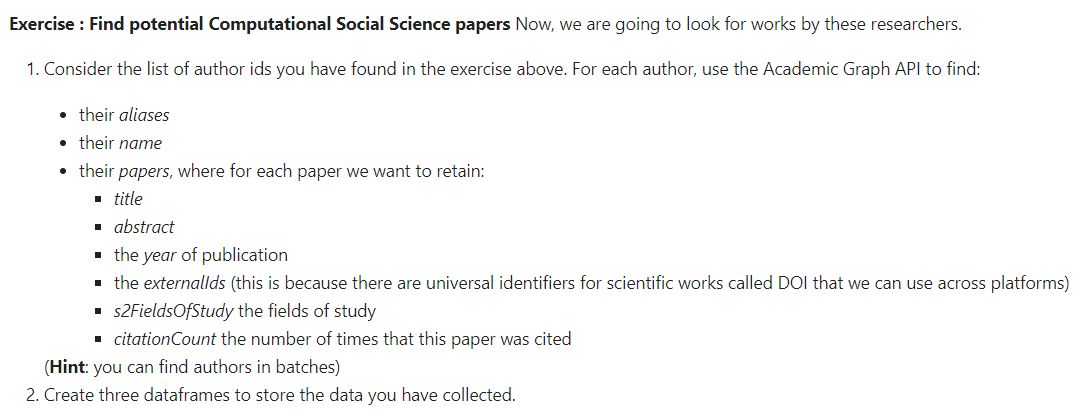

In [13]:
my_url = "https://api.semanticscholar.org/graph/v1/author/1741101?fields=aliases,name,papers.title,papers.abstract,papers.publicationDate,papers.externalIds,papers.s2FieldsOfStudy,papers.citationCount"

In [15]:
r = requests.get(my_url)
r

<Response [200]>

In [63]:
# 1
import requests

BASE_URL = 'https://api.semanticscholar.org/graph/'
VERSION = 'v1/'
RESOURCE = 'author/batch'

ids_json = {"ids" : ["2052431494","1741101"]}
params = {"fields": ["name,aliases,papers,papers.title,papers.abstract,papers.year,papers.externalIds,papers.s2FieldsOfStudy,papers.citationCount"]
          }

COMPLETE_URL = BASE_URL + VERSION + RESOURCE
response = requests.post(COMPLETE_URL,json=ids_json,params=params).json()

print(response)

[{'authorId': '2052431494', 'name': 'P. Howard', 'aliases': ['Philip . Howard', 'Philip Howard', 'Philip Eugene Howard'], 'papers': [{'paperId': 'a5631b6117b8ec6b2a56e6085e64f80776c7197b', 'externalIds': {'MAG': '1600322023', 'CorpusId': 153326170}, 'title': "Sunday-schools the world around; the official report of the World's fifth Sunday-school convention in Rome, May 18-23, 1907", 'abstract': None, 'year': 2010, 'citationCount': 1, 's2FieldsOfStudy': [{'category': 'History', 'source': 's2-fos-model'}]}, {'paperId': '542585c9d809017da154c5f3c7778fc45ca78ce2', 'externalIds': {'MAG': '2176545370', 'DOI': '10.1400/173374', 'CorpusId': 194111615}, 'title': 'The Villa dei Gordiani Project : The so-called Villa dei Gordiani at the 3rd mile of the Via Prenestina : Reassessment of a Roman and Medieval Site in the Suburbs of Rome', 'abstract': None, 'year': 2008, 'citationCount': 0, 's2FieldsOfStudy': [{'category': 'History', 'source': 's2-fos-model'}]}, {'paperId': '632a6e48b3cd2ad4b8fc8ea419

In [1]:
# 2
import pandas as pd





## Week 3 (Data Visualization)

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

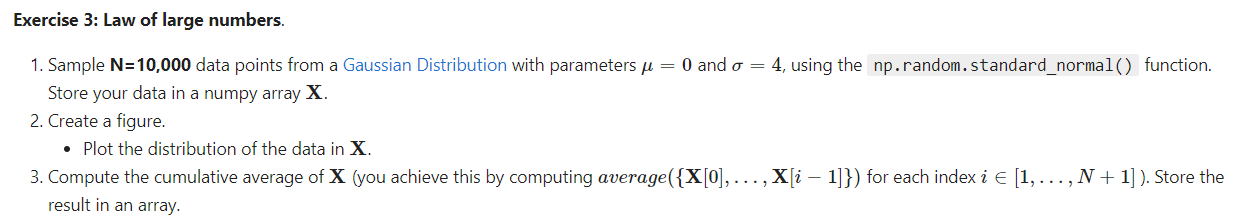

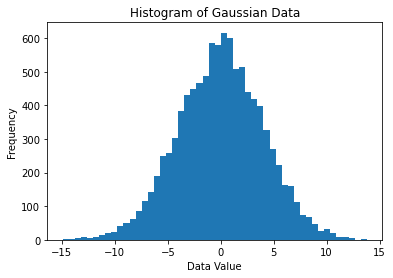

In [37]:
# Vi vælger mean & Standard deviatiob for vores normal fordeling
mu = 0
sigma = 4
# laver en random sample af 10.000 data points for normal fordeling
X = np.random.standard_normal(size=10000) * sigma + mu
# Laver histogram
plt.hist(X, bins=50)

plt.title("Histogram of Gaussian Data")
plt.xlabel("Data Value")
plt.ylabel("Frequency")

plt.show()

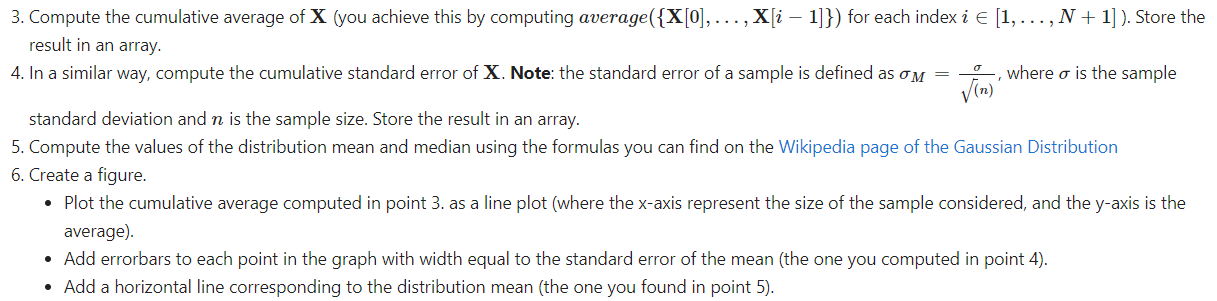

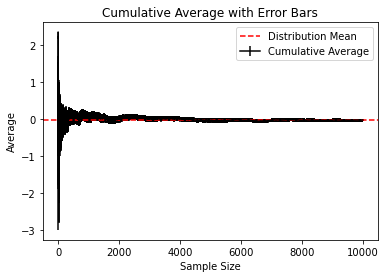

In [38]:
#Find cumulative sum
#Cumulative sums, or running totals, are used to display the total sum of data as it grows with time
cumulative_sum = np.cumsum(X)


sequence = np.arange(1, len(X)+1)
cumulative_average = cumulative_sum / sequence

#Finder cumulative standard error
cumulative_std_error = np.zeros_like(X)
for i in range(1, len(X) + 1):
    subsequence = X[:i]
    sigma = np.std(subsequence, ddof=1)
    n = len(subsequence)
    std_error = sigma / np.sqrt(n)
    cumulative_std_error[i-1] = std_error

#Finder mean and median
distribution_mean = np.mean(X)
distribution_median = np.median(X)

#Lav en figur med "cumulative average" med error bar og mean
fig, ax = plt.subplots()
#errorbar med "width equal to the standard error of the mean"
ax.errorbar(np.arange(1, len(X) + 1), cumulative_average, yerr=cumulative_std_error, fmt='-', label='Cumulative Average', color = "k")
#vandret linje
ax.axhline(distribution_mean, color='r', linestyle='--', label='Distribution Mean')

ax.set_title('Cumulative Average with Error Bars')
ax.set_xlabel('Sample Size')
ax.set_ylabel('Average')
ax.legend()
plt.show()

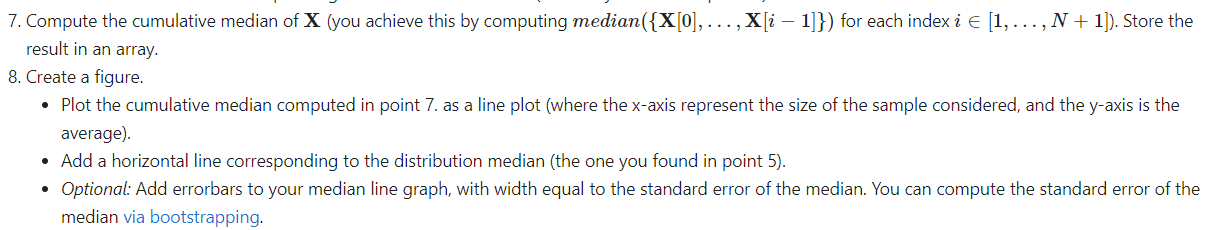

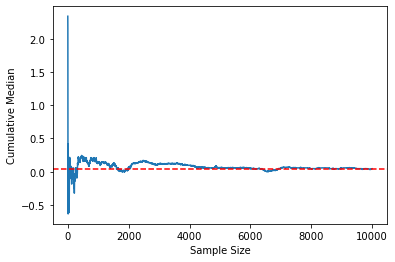

In [43]:
#Find median 
cumulative_median = np.zeros_like(X)
for i in range(len(X)):
    subsequence = X[:i+1]
    cumulative_median[i] = np.median(subsequence)
#Lav figur
fig, ax = plt.subplots()
#Cumulative median som linje plot
ax.plot(np.arange(len(X)) + 1, cumulative_median)

#vandret linje
ax.axhline(distribution_median, linestyle='--', color='red')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Cumulative Median')
plt.show()